In [1]:
import datetime
import time
import requests
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from config import get_from_config, save_to_config
from acnet_reader.acnet_reader import fetch_data, get_interpolated_df, fetch_interpolated_data
import fur.path_assistant as path_assistant
plt.rcParams['figure.figsize'] = [20, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
shift_03_10_2020 = path_assistant.PathAssistant('shift_03_10_2020')
waveforms_dir = shift_03_10_2020.get_waveforms_dir()
results_dir = shift_03_10_2020.get_results_dir()
acnet_data_dir = shift_03_10_2020.get_acnet_data_dir()
bpm_data_dir = shift_03_10_2020.get_bpm_data_dir()
bpm_files_df = shift_03_10_2020.get_bpm_files_df()
acnet_data_df = shift_03_10_2020.get_acnet_data_df("all_acnet_data_03_10_2020.csv")
fluctuations_df = shift_03_10_2020.get_fluctuations_df("res_df_nd_filters_data_03_10_2020.csv")
from fur.extending_with_acnet_data import extend_fluctuations_df_with_acnet_data, extend_fluctuations_df_with_bunch_size
import lattice.lattice as lattice
from lattice.summary_in_undulator import get_summary_in_undulator
lattice_file = shift_03_10_2020.get_6dsim_dir().fi("IOTA_1NL_100MeV_v8.6.1.3.6ds_data.txt")


In [2]:
lattice.get_dpp(40, 350)

0.00033960086550791486

In [3]:
f = extend_fluctuations_df_with_acnet_data(fluctuations_df, bpm_files_df, acnet_data_df)

In [4]:
f.head()

,waveform_file,ch2_amplitude,var_of_ch1_amplitude,noise_var,file_datetime,rounded_bpm_file_datetime,N:IWCMI,N:IBEAMA,N:IWCMBE,N:IWCMBR,...,N:ITC1RSV,N:ITC2RSV,N:ITC3RSV,N:ITC4RSV,N:ITC4LSV,N:ITC3LSV,N:ITC2LSV,N:ITC1LSV,N:IWCMI_recalibrated_to_IWCMI_absolute,N:IBEAM_recalibrated_to_IWCMI_absolute
0,RefCurve_2020-03-10_10_121356.Wfm.bin,0.330092,1.772634e-08,8.758955e-08,2020-03-10 12:13:56,2020-03-10 11:32:12,-3.093358,-2.802270,29.953456,32.344859,...,114.44035,81.333500,95.904553,105.9989,161.117400,72.665100,71.402653,132.809895,-2.736274,-2.709058
1,RefCurve_2020-03-10_11_121907.Wfm.bin,0.330524,1.762730e-08,8.764898e-08,2020-03-10 12:19:07,2020-03-10 11:35:51,-3.097857,-2.806184,29.897783,32.374912,...,115.71420,81.610001,96.689003,105.9989,162.715390,73.558800,71.875999,135.178600,-2.740254,-2.712842
2,RefCurve_2020-03-10_12_122451.Wfm.bin,0.275670,1.260909e-08,8.668348e-08,2020-03-10 12:24:51,2020-03-10 11:40:03,-3.096819,-2.856270,29.734933,32.018936,...,115.44240,82.073708,97.829498,105.9989,164.805300,74.942101,72.460999,138.439500,-2.739336,-2.761262
3,RefCurve_2020-03-10_13_123150.Wfm.bin,0.276897,1.380891e-08,8.724680e-08,2020-03-10 12:31:50,2020-03-10 11:42:27,-3.098780,-2.852180,29.455165,31.736434,...,118.71730,82.654099,98.804298,105.9989,167.428410,76.405602,73.083900,141.577300,-2.741070,-2.757308
4,RefCurve_2020-03-10_14_123409.Wfm.bin,0.276813,1.289925e-08,8.696409e-08,2020-03-10 12:34:09,2020-03-10 11:46:06,-3.099143,-2.848180,29.392470,31.740029,...,120.16190,82.150852,99.131051,105.9989,167.700345,76.096298,73.299198,142.932150,-2.741392,-2.753441


In [5]:
extend_fluctuations_df_with_bunch_size(f, lattice_file)

,waveform_file,ch2_amplitude,var_of_ch1_amplitude,noise_var,file_datetime,rounded_bpm_file_datetime,N:IWCMI,N:IBEAMA,N:IWCMBE,N:IWCMBR,...,N:ITC2LSV,N:ITC1LSV,N:IWCMI_recalibrated_to_IWCMI_absolute,N:IBEAM_recalibrated_to_IWCMI_absolute,Sigma_um_X,Sigma_um_X_err,Sigma_um_Y,Sigma_um_Y_err,Angle_spread_rad_X,Angle_spread_rad_Y
0,RefCurve_2020-03-10_10_121356.Wfm.bin,0.330092,1.772634e-08,8.758955e-08,2020-03-10 12:13:56,2020-03-10 11:32:12,-3.093358,-2.802270,29.953456,32.344859,...,71.402653,132.809895,-2.736274,-2.709058,1220.353647,19.309258,89.965576,7.633846,0.000934,0.000121
1,RefCurve_2020-03-10_11_121907.Wfm.bin,0.330524,1.762730e-08,8.764898e-08,2020-03-10 12:19:07,2020-03-10 11:35:51,-3.097857,-2.806184,29.897783,32.374912,...,71.875999,135.178600,-2.740254,-2.712842,1215.876879,19.083800,91.031651,7.573475,0.000931,0.000123
2,RefCurve_2020-03-10_12_122451.Wfm.bin,0.275670,1.260909e-08,8.668348e-08,2020-03-10 12:24:51,2020-03-10 11:40:03,-3.096819,-2.856270,29.734933,32.018936,...,72.460999,138.439500,-2.739336,-2.761262,1190.768001,18.663058,92.215531,7.541902,0.000911,0.000124
3,RefCurve_2020-03-10_13_123150.Wfm.bin,0.276897,1.380891e-08,8.724680e-08,2020-03-10 12:31:50,2020-03-10 11:42:27,-3.098780,-2.852180,29.455165,31.736434,...,73.083900,141.577300,-2.741070,-2.757308,1186.331549,18.714400,93.964662,7.450895,0.000908,0.000127
4,RefCurve_2020-03-10_14_123409.Wfm.bin,0.276813,1.289925e-08,8.696409e-08,2020-03-10 12:34:09,2020-03-10 11:46:06,-3.099143,-2.848180,29.392470,31.740029,...,73.299198,142.932150,-2.741392,-2.753441,1177.463515,19.748678,94.448739,7.327323,0.000901,0.000127
5,RefCurve_2020-03-10_15_123707.Wfm.bin,0.156156,5.852147e-09,8.776490e-08,2020-03-10 12:37:07,2020-03-10 11:50:09,-3.095244,-2.861315,29.390068,31.748269,...,73.512199,144.182600,-2.737942,-2.766139,1177.865128,18.884387,95.054589,7.345640,0.000901,0.000128
6,RefCurve_2020-03-10_16_124126.Wfm.bin,0.156456,6.352127e-09,8.719776e-08,2020-03-10 12:41:26,2020-03-10 11:52:14,-3.095742,-2.845090,29.534337,31.940968,...,73.175503,142.053890,-2.738383,-2.750454,1190.641697,19.008999,93.905914,7.425582,0.000911,0.000127
7,RefCurve_2020-03-10_17_124538.Wfm.bin,0.156219,6.083763e-09,8.703252e-08,2020-03-10 12:45:38,2020-03-10 11:59:56,-3.099210,-2.805270,29.579234,32.103282,...,72.886852,140.534700,-2.741451,-2.711958,1202.658686,19.226002,93.343906,7.459192,0.000920,0.000126
8,RefCurve_2020-03-10_18_125040.Wfm.bin,0.069498,2.349403e-09,8.777711e-08,2020-03-10 12:50:40,2020-03-10 12:05:04,-3.107878,-2.817408,30.004467,32.516025,...,71.725651,134.110295,-2.749118,-2.723693,1218.335835,19.411686,90.039301,7.656017,0.000932,0.000122
9,RefCurve_2020-03-10_19_125407.Wfm.bin,0.069349,2.174498e-09,8.760661e-08,2020-03-10 12:54:07,2020-03-10 12:14:16,-3.105938,-2.872040,29.293776,31.602459,...,73.590049,144.443790,-2.747402,-2.776507,1175.296370,18.813827,95.289718,7.341085,0.000899,0.000129


From memory, the time stamp on the bunch profile monitor waveforms whould be close to the actual time when the fluctuations waveform was taken. Not sure about the time stamp on the fluctuaitons waveform file. Should be close, but could be wrong for a few seconds.

In [6]:
iwcm_to_wbeam = get_from_config("IWCMI_to_IBEAMA")
iwcmi0 = -3.040

In [7]:
fluctuations_df.sort_values("file_datetime")
bpm_files_df.sort_values("file_datetime")
RS_scope_behind = np.mean(bpm_files_df["file_datetime"]-fluctuations_df["file_datetime"])
print("R&S scope's time is behind by {}".format(RS_scope_behind))

R&S scope's time is behind by -1 days +23:55:51.952999


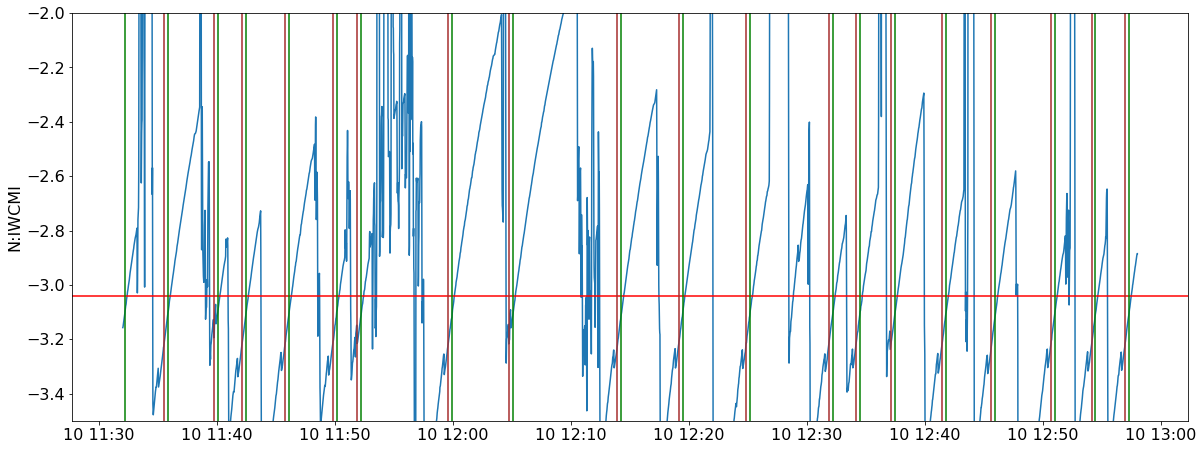

In [8]:
ax = sns.lineplot(x=acnet_data_df.index, y=acnet_data_df["N:IWCMI"])
ax.set_ylim(-3.5, -2.0)
plt.axhline(iwcmi0, color="red")
for t in fluctuations_df["file_datetime"]:
    plt.axvline(t, color="brown")
for t in bpm_files_df["file_datetime"]:
    plt.axvline(t, color="green")
plt.show()

In [9]:
fluctuations_df["rounded_bpm_file_datetime"] = bpm_files_df["file_datetime"].apply(lambda t: t.round(freq='S'))

In [10]:
fluctuations_df.head()

,waveform_file,ch2_amplitude,var_of_ch1_amplitude,noise_var,file_datetime,rounded_bpm_file_datetime
0,RefCurve_2020-03-10_10_121356.Wfm.bin,0.330092,1.772634e-08,8.758955e-08,2020-03-10 12:13:56,2020-03-10 11:32:12
1,RefCurve_2020-03-10_11_121907.Wfm.bin,0.330524,1.762730e-08,8.764898e-08,2020-03-10 12:19:07,2020-03-10 11:35:51
2,RefCurve_2020-03-10_12_122451.Wfm.bin,0.275670,1.260909e-08,8.668348e-08,2020-03-10 12:24:51,2020-03-10 11:40:03
3,RefCurve_2020-03-10_13_123150.Wfm.bin,0.276897,1.380891e-08,8.724680e-08,2020-03-10 12:31:50,2020-03-10 11:42:27
4,RefCurve_2020-03-10_14_123409.Wfm.bin,0.276813,1.289925e-08,8.696409e-08,2020-03-10 12:34:09,2020-03-10 11:46:06


In [11]:
cameras = ["N:ITC1RSV", "N:ITC1RSH",
           "N:ITC2RSV", "N:ITC2RSH",
           "N:ITC3RSV", "N:ITC3RSH",
           "N:ITC4RSV", "N:ITC4RSH",
           "N:ITC4LSV", "N:ITC4LSH",
           "N:ITC3LSV", "N:ITC3LSH",
           "N:ITC2LSV", "N:ITC2LSH",
           "N:ITC1LSV", "N:ITC1LSH"]

In [12]:
acnet_addition = acnet_data_df.loc[acnet_data_df.index.isin(fluctuations_df["rounded_bpm_file_datetime"])].loc[:,["N:IWCMI","N:IBEAMA","N:IWCMBE","N:IWCMBR", "N:IWCMBF", "N:IWCMBG", "N:IRFEPA"]+cameras]

In [13]:
fluctuations_df = pd.concat([fluctuations_df, acnet_addition.reset_index(drop=True)], axis=1)

In [14]:
bunch_params_des = fluctuations_df.describe().iloc[:,3:]
bunch_params_des

,N:IWCMI,N:IBEAMA,N:IWCMBE,N:IWCMBR,N:IWCMBF,N:IWCMBG,N:IRFEPA,N:ITC1RSV,N:ITC1RSH,N:ITC2RSV,...,N:ITC4RSV,N:ITC4RSH,N:ITC4LSV,N:ITC4LSH,N:ITC3LSV,N:ITC3LSH,N:ITC2LSV,N:ITC2LSH,N:ITC1LSV,N:ITC1LSH
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.0000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,-3.100227,-2.833455,29.527790,31.931064,64.306852,28.121226,382.279831,118.530762,482.450177,82.412840,...,105.9989,7.327710e+02,166.666143,1105.036653,76.117471,1686.957250,73.019205,1594.790689,141.108277,515.155098
std,0.005064,0.020157,0.225956,0.260632,0.342969,0.197241,0.119050,2.974828,5.504193,0.537434,...,0.0000,1.168021e-13,2.608075,12.602583,1.598538,20.920545,0.706946,18.096886,3.708647,5.941182
min,-3.108225,-2.872040,29.250820,31.601951,63.895694,27.889435,382.120792,112.151400,474.122360,81.333500,...,105.9989,7.327710e+02,161.117400,1087.159550,72.665100,1651.745500,71.402653,1569.714450,132.809895,506.609985
25%,-3.104813,-2.850180,29.380997,31.744149,64.097206,27.995116,382.188999,116.722400,479.333208,82.112280,...,105.9989,7.327710e+02,165.520477,1095.714750,75.443699,1670.604500,72.691126,1580.922025,139.487100,510.531488
50%,-3.099210,-2.831030,29.455879,31.842225,64.227599,28.060183,382.228343,118.717300,480.909285,82.559799,...,105.9989,7.327710e+02,167.385300,1103.680100,76.409900,1684.347550,73.239998,1591.022600,142.063110,514.092530
75%,-3.096281,-2.820992,29.632412,32.061109,64.381353,28.185677,382.363568,120.237075,484.054703,82.803501,...,105.9989,7.327710e+02,168.780145,1110.445025,77.409077,1696.970000,73.551124,1603.713750,144.109270,517.644240
max,-3.091189,-2.802270,30.004467,32.516025,65.094828,28.520181,382.508177,123.753490,494.067745,83.040550,...,105.9989,7.327710e+02,169.414090,1128.924500,77.887497,1723.922500,73.802299,1629.262450,144.950100,526.110995


In [15]:
fluctuations_df.to_csv(results_dir.fi("res_df_nd_filters_data_plus_acnet_03_10_2020.csv"))